In [ ]:
!gdown 1f5Cld_DOCzsqpkBWZ9Gi21-FmWCqsbnq

Downloading...
From (original): https://drive.google.com/uc?id=1f5Cld_DOCzsqpkBWZ9Gi21-FmWCqsbnq
From (redirected): https://drive.google.com/uc?id=1f5Cld_DOCzsqpkBWZ9Gi21-FmWCqsbnq&confirm=t&uuid=c7efbf72-604a-41c4-ba52-37eaea18b1c5
To: /content/dataset.zip
100% 204M/204M [00:04<00:00, 46.7MB/s]


In [ ]:
!unzip '/content/dataset.zip'

Archive:  /content/dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Dataset_BUSI_with_GT

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import glob
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow import keras

In [ ]:
images = []
mask = glob.glob("/content/Dataset_BUSI_with_GT/*/*_mask.png")
for i in mask:
    images.append(i.replace('_mask',''))

In [ ]:
print(images[:5])
print('-------------------')
print(mask[:5])

['/content/Dataset_BUSI_with_GT/benign/benign (437).png', '/content/Dataset_BUSI_with_GT/benign/benign (63).png', '/content/Dataset_BUSI_with_GT/benign/benign (84).png', '/content/Dataset_BUSI_with_GT/benign/benign (115).png', '/content/Dataset_BUSI_with_GT/benign/benign (269).png']
-------------------
['/content/Dataset_BUSI_with_GT/benign/benign (437)_mask.png', '/content/Dataset_BUSI_with_GT/benign/benign (63)_mask.png', '/content/Dataset_BUSI_with_GT/benign/benign (84)_mask.png', '/content/Dataset_BUSI_with_GT/benign/benign (115)_mask.png', '/content/Dataset_BUSI_with_GT/benign/benign (269)_mask.png']


In [ ]:
data = pd.DataFrame({'images':images,'masks':mask})
data.head(9)

,images,masks
0,/content/Dataset_BUSI_with_GT/benign/benign (4...,/content/Dataset_BUSI_with_GT/benign/benign (4...
1,/content/Dataset_BUSI_with_GT/benign/benign (6...,/content/Dataset_BUSI_with_GT/benign/benign (6...
2,/content/Dataset_BUSI_with_GT/benign/benign (8...,/content/Dataset_BUSI_with_GT/benign/benign (8...
3,/content/Dataset_BUSI_with_GT/benign/benign (1...,/content/Dataset_BUSI_with_GT/benign/benign (1...
4,/content/Dataset_BUSI_with_GT/benign/benign (2...,/content/Dataset_BUSI_with_GT/benign/benign (2...
5,/content/Dataset_BUSI_with_GT/benign/benign (2...,/content/Dataset_BUSI_with_GT/benign/benign (2...
6,/content/Dataset_BUSI_with_GT/benign/benign (4...,/content/Dataset_BUSI_with_GT/benign/benign (4...
7,/content/Dataset_BUSI_with_GT/benign/benign (3...,/content/Dataset_BUSI_with_GT/benign/benign (3...
8,/content/Dataset_BUSI_with_GT/benign/benign (2...,/content/Dataset_BUSI_with_GT/benign/benign (2...


In [ ]:
data.shape

(780, 2)

In [ ]:
data_train,data_test=train_test_split(data,test_size=0.1)

data_train,data_val=train_test_split(data_train,test_size=0.1)

In [ ]:
datagen = ImageDataGenerator(rotation_range=0.2,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            horizontal_flip=True,
                            fill_mode='nearest',
                            rescale=1./255)

In [ ]:
image_train=datagen.flow_from_dataframe(data_train,
                                    target_size=(512,512),
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=123,
                                    x_col ="images",
                                    batch_size=8,
                                    class_mode=None

)
mask_train=datagen.flow_from_dataframe(data_train,
                                    target_size=(512,512),
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=123,
                                    x_col ="masks",
                                    batch_size=8,
                                    class_mode=None
)

Found 631 validated image filenames.
Found 631 validated image filenames.


In [ ]:
image_validation=datagen.flow_from_dataframe(data_val,
                                    target_size=(512,512),
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=123,
                                    x_col ="images",
                                    batch_size=8,
                                    class_mode=None
)

mask_validation=datagen.flow_from_dataframe(data_val,
                                    target_size=(512,512),
                                    color_mode='grayscale',
                                    shuffle=True,
                                    seed=123,
                                    x_col ="masks",
                                    batch_size=8,
                                    class_mode=None
)

Found 71 validated image filenames.
Found 71 validated image filenames.


In [ ]:
train_gen=zip(image_train,mask_train)
valid_gen=zip(image_validation,mask_validation)

## Building the model

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet101

In [ ]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

In [ ]:
def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2,2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [ ]:
def build_resnet101_unet(input_shape):
    inputs = Input(input_shape)

    """ Pre-trained ResNet101 Model """
    resnet101 = ResNet101(include_top=False, weights="imagenet", input_tensor=inputs)

    """ Encoder """
    s1 = resnet101.get_layer("conv1_relu").output          # (None, 256, 256, 64)
    s2 = resnet101.get_layer("conv2_block3_out").output    # (None, 128, 128, 256)
    s3 = resnet101.get_layer("conv3_block4_out").output    # (None, 64, 64, 512)
    s4 = resnet101.get_layer("conv4_block6_out").output    # (None, 32, 32, 2048)

    """ Bridge """
    b1 = resnet101.get_layer("conv5_block3_out").output  # (None, 16, 16, 2048)

    """ Decoder """
    d1 = decoder_block(b1, s4, 512)                     # (None, 32, 32, 512)
    d2 = decoder_block(d1, s3, 256)                     # (None, 64, 64, 256)
    d3 = decoder_block(d2, s2, 128)                     # (None, 128, 128, 128)
    d4 = decoder_block(d3, s1, 64)                      # (None, 256, 256, 64)

    d5 = decoder_block(d4, inputs, 64)

    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d5)

    model = Model(inputs, outputs, name="ResNet101_U-Net")
    return model

In [ ]:
model = build_resnet101_unet((512,512,3))

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model.summary()

Model: "ResNet101_U-Net"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 518, 518, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 256, 256, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 256, 256, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 256, 256, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 258, 258, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 128, 128, 64)   │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 128, 128, 64)   │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 128, 128, 64)   │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 128, 128, 64)   │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 128, 128, 64)   │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 128, 128, 256)  │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 128, 128, 256)  │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 60,140,673 (229.42 MB)

 Trainable params: 60,031,233 (229.00 MB)

 Non-trainable params: 109,440 (427.50 KB)

### Defining Metrics And Loss Functions

In [ ]:
import tensorflow as tf

def pixel_accuracy(y_true, y_pred):
    # Convert the predicted probabilities to class labels
    y_pred = tf.argmax(y_pred, axis=-1)

    # Flatten the tensors
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    # Cast y_true to the same data type as y_pred
    y_true = tf.cast(y_true, y_pred.dtype)

    # Calculate the pixel accuracy
    correct_pixels = tf.reduce_sum(tf.cast(tf.equal(y_true, y_pred), tf.float32))
    total_pixels = tf.cast(tf.size(y_true), tf.float32)

    accuracy = correct_pixels / total_pixels
    return accuracy


In [ ]:
import tensorflow as tf

def dice_coef(y_true, y_pred, smooth=1):
    # Ensure y_true and y_pred have the same shape
    y_true = tf.image.resize(y_true, tf.shape(y_pred)[1:3]) # Resize y_true to match y_pred
    y_true = tf.one_hot(tf.argmax(y_true, axis=-1), 3)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), 3)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice_coef = (2.0 * intersection + smooth) / (union + smooth)
    return dice_coef


def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)


from tensorflow.keras.losses import BinaryCrossentropy

def bce_dice_loss(y_true, y_pred):
    bce = BinaryCrossentropy(from_logits=True)
    return dice_coef_loss(y_true, y_pred) + bce(y_true, y_pred)

In [ ]:
import tensorflow.keras as keras
keras.utils.get_custom_objects()['pixel_accuracy'] = pixel_accuracy
keras.utils.get_custom_objects()['dice_coef'] = dice_coef
keras.utils.get_custom_objects()['dice_coef_loss'] = dice_coef_loss
keras.utils.get_custom_objects()['bce_dice_loss'] = bce_dice_loss

### Training the model

In [ ]:
model.compile(
    optimizer='adam',
    loss=bce_dice_loss,
    metrics=[dice_coef,'accuracy'])

In [ ]:
import tensorflow as tf

def train_generator():
    for img, mask in zip(image_train, mask_train):
        yield img, mask

def val_generator():
    for img, mask in zip(image_validation, mask_validation):
        yield img, mask

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_generator(
    train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32)
    )
    #drop_remainder=True
)

val_dataset = tf.data.Dataset.from_generator(
    val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32)
    )
    #drop_remainder=True
)

# Now you can pass these datasets to model.fit:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    validation_steps=int(len(data_val) / 8),  # Adjust if needed
    steps_per_epoch=int(len(data_train) / 8)   # Adjust if needed
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:780: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


78/78 ━━━━━━━━━━━━━━━━━━━━ 307s 1s/step - accuracy: 0.8539 - dice_coef: 1.0000 - loss: 0.3757 - val_accuracy: 0.0703 - val_dice_coef: 1.0000 - val_loss: 7627.0723
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9257 - dice_coef: 1.0000 - loss: 0.2074 - val_accuracy: 0.2123 - val_dice_coef: 1.0000 - val_loss: 377039.2812
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9365 - dice_coef: 1.0000 - loss: 0.1809 - val_accuracy: 0.5910 - val_dice_coef: 1.0000 - val_loss: 1.2040
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9399 - dice_coef: 1.0000 - loss: 0.1655 - val_accuracy: 0.7188 - val_dice_coef: 1.0000 - val_loss: 0.4100
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9445 - dice_coef: 1.0000 - loss: 0.1583 - val_accuracy: 0.8066 - val_dice_coef: 1.0000 - val_loss: 0.3072
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.9438 - dice_coef: 1.0000 - loss: 0.1572 - val_accuracy: 0.7178 - val_dice_coef: 1.0

In [ ]:
# history = model.fit(
#     train_gen,
#     validation_data=valid_gen,
#     epochs=50,
#     validation_steps=len(data_val) /8,
#     steps_per_epoch=len(data_train) /8
# )

In [ ]:
# eval_results = model.evaluate(valid_gen, steps=len(data_val) /32, verbose=1)
eval_results = model.evaluate(val_dataset, steps=int(len(data_val) / 32), verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 896ms/step - accuracy: 0.9639 - dice_coef: 1.0000 - loss: 0.1249


### Making predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


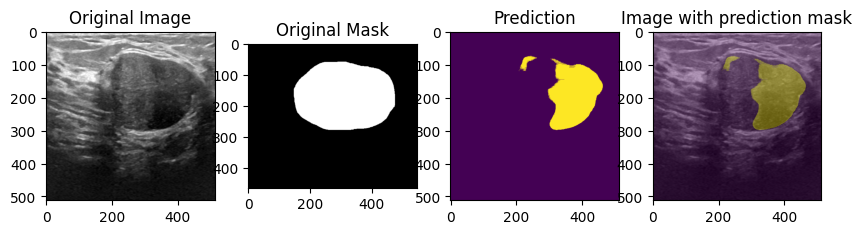

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


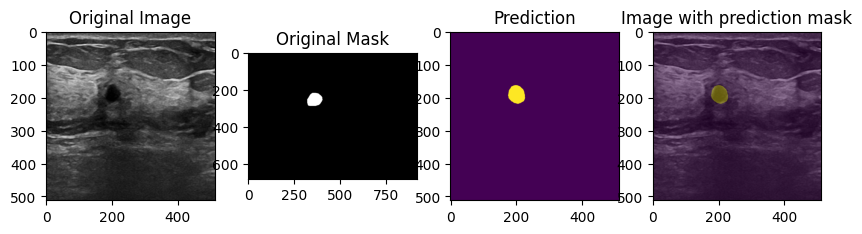

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


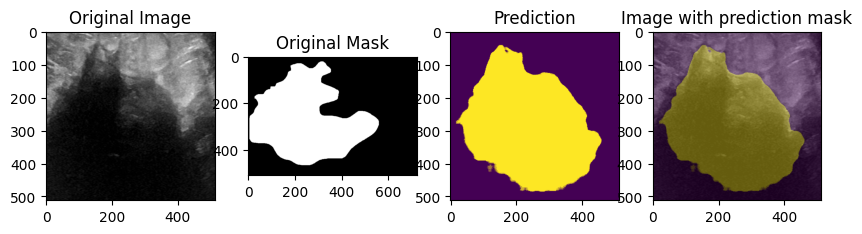

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


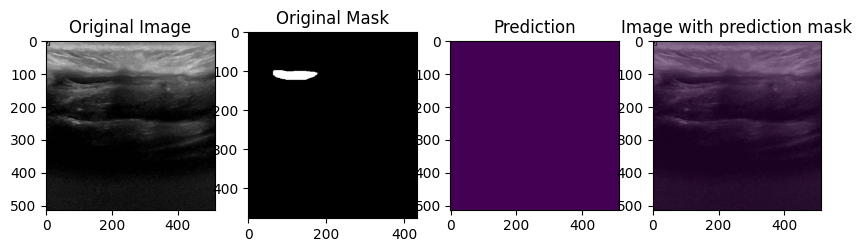

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


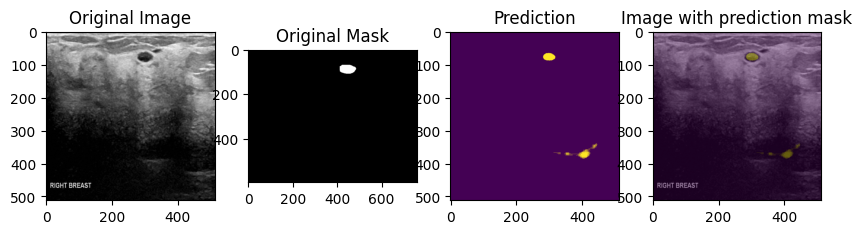

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


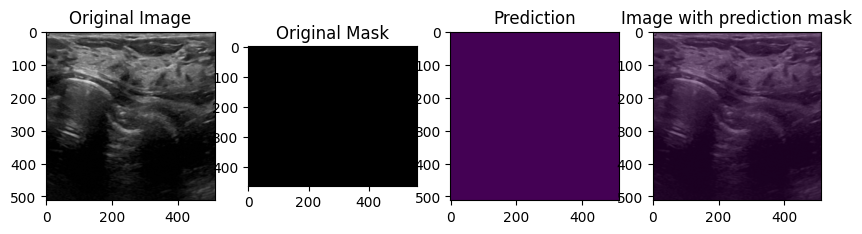

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


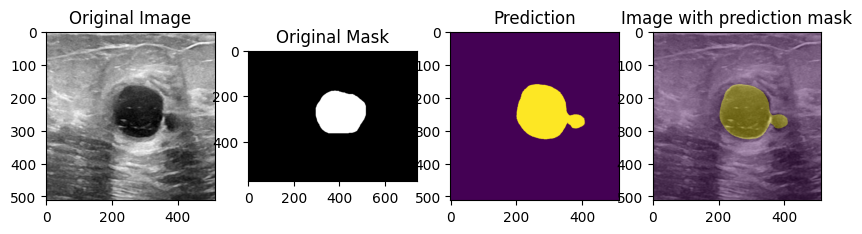

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


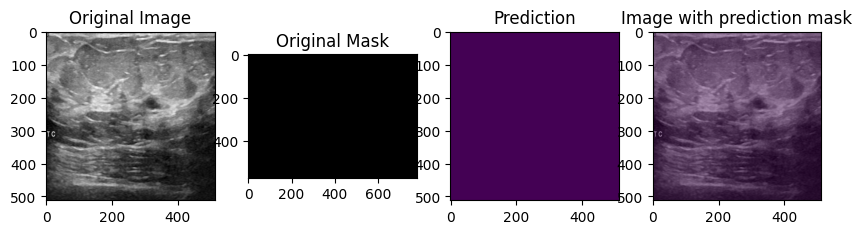

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


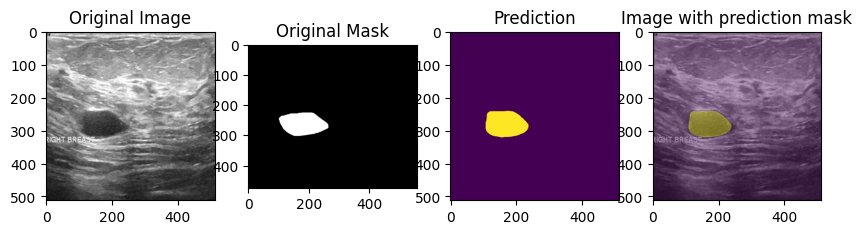

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


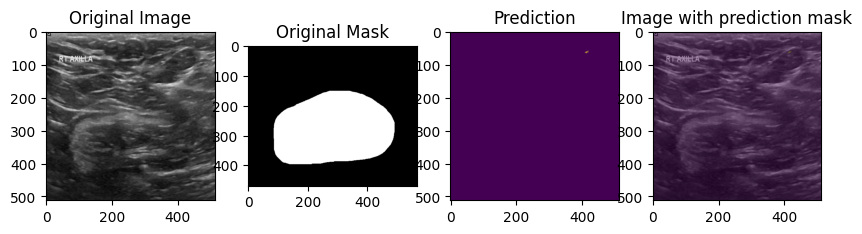

In [ ]:
import cv2
for i in range(10):
    index=np.random.randint(1,len(data_test.index))
    img = cv2.imread(data_test['images'].iloc[index])
    img = cv2.resize(img ,(512, 512))
    img = img / 255
    img = img[np.newaxis, :, :, :]
    pred=model.predict(img)

    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.imshow(np.squeeze(img))
    plt.title('Original Image')
    plt.subplot(1,4,2)
    plt.imshow(np.squeeze(cv2.imread(data_test['masks'].iloc[index])))
    plt.title('Original Mask')
    plt.subplot(1,4,3)
    plt.imshow(np.squeeze(pred) > .8)
    plt.title('Prediction')
    plt.subplot(1,4,4)
    plt.imshow(np.squeeze(img))
    plt.imshow(np.squeeze(pred) > .8,alpha=0.4)
    plt.title('Image with prediction mask')
    plt.show()

### Saving the model

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)